In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Removed decomissioned stations before processing

In [3]:
non_decomm = pd.read_csv('non_decomm.csv')
non_decomm

,Unnamed: 0,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,usertype,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date
0,0,2875,18/10/2014,14:33:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
1,1,2883,18/10/2014,14:38:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
2,2,2884,18/10/2014,14:38:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
3,3,2885,18/10/2014,14:38:00,SEA00241,1608.851,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
4,4,3545,19/10/2014,14:46:00,SEA00126,1729.370,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,BLANK,47.614315,-122.354093,13-Oct-14,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277343,286853,33119,30/01/2015,18:59:00,SEA00023,271.423,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,44.0,Fog,47.619859,-122.330304,13-Oct-14,20.0,NaN
277344,286854,45650,10/03/2015,18:59:00,SEA00377,474.198,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,50.0,Fog-Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
277345,286855,47828,17/03/2015,18:57:00,SEA00315,532.461,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,51.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN
277346,286856,72199,11/05/2015,18:56:00,SEA00403,365.241,REI / Yale Ave N & John St,SLU-01,Member,18:00:00,56.0,Rain,47.619859,-122.330304,13-Oct-14,20.0,NaN


In [4]:
non_decomm1 = pd.DataFrame(non_decomm.groupby(['Date', 'from_station_name', 'Mean_Temperature_F', 'Events']).size().reset_index().rename(columns={0: 'number_of_trips'}))

In [5]:
non_decomm1.sample(5)

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
15662,16/08/2015,1st Ave & Marion St,68.0,BLANK,11
7763,08/10/2015,1st Ave & Marion St,64.0,BLANK,11
17723,18/07/2016,Harvard Ave & E Pine St,67.0,BLANK,8
9939,10/12/2014,Dexter Ave N & Aloha St,61.0,Rain,4
30364,30/12/2014,Republican St & Westlake Ave N,34.0,BLANK,10


In [6]:
non_decomm1 = pd.get_dummies(non_decomm1, columns=['Events'])
non_decomm1.sample(5)

,Date,from_station_name,Mean_Temperature_F,number_of_trips,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
15368,16/04/2016,Summit Ave E & E Republican St,56.0,3,1,0,0,0,0,0,0
5884,06/11/2015,Lake Union Park / Valley St & Boren Ave N,56.0,1,0,0,0,1,0,0,0
2188,03/03/2016,7th Ave & Union St,52.0,2,0,0,0,1,0,0,0
9492,10/06/2016,12th Ave & E Mercer St,58.0,11,0,0,0,1,0,0,0
15852,16/10/2014,UW Magnuson Health Sciences Center Rotunda / C...,61.0,12,0,0,0,1,0,0,0


In [7]:
non_decomm1.sample(5)

,Date,from_station_name,Mean_Temperature_F,number_of_trips,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
4374,05/05/2016,12th Ave & E Denny Way,60.0,5,1,0,0,0,0,0,0
23374,24/01/2015,Pine St & 9th Ave,58.0,4,1,0,0,0,0,0,0
17054,17/12/2014,Key Arena / 1st Ave N & Harrison St,48.0,4,0,0,0,1,0,0,0
12871,13/11/2014,Children's Hospital / Sandpoint Way NE & 40th ...,40.0,6,1,0,0,0,0,0,0
23549,24/03/2015,Westlake Ave & 6th Ave,52.0,26,0,0,0,1,0,0,0


In [8]:
non_decomm1.columns

Index(['Date', 'from_station_name', 'Mean_Temperature_F', 'number_of_trips',
       'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain', 'Events_Rain',
       'Events_Rain-Snow', 'Events_Rain-Thunderstorm', 'Events_Snow'],
      dtype='object')

In [9]:
X = non_decomm1[['Mean_Temperature_F',
                    'Events_BLANK', 
                    'Events_Fog', 
                    'Events_Fog-Rain', 
                    'Events_Rain',
                    'Events_Rain-Snow', 
                    'Events_Rain-Thunderstorm', 
                    'Events_Snow']]

y = non_decomm1['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42) 

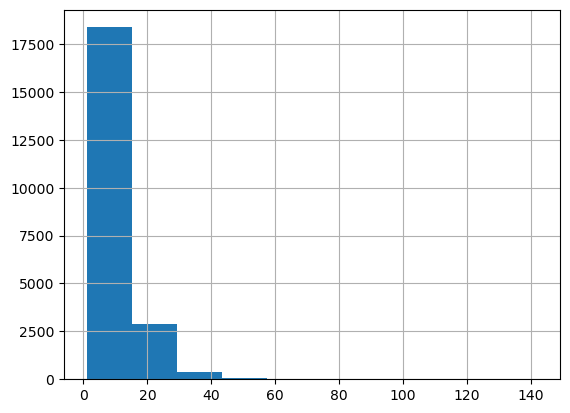

In [10]:
y_train.hist();

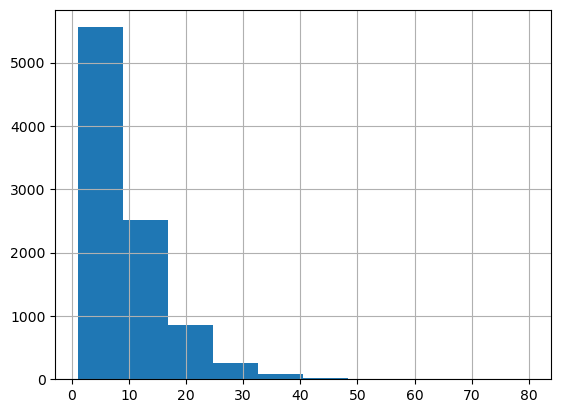

In [11]:
y_test.hist();

In [12]:
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [13]:
cols = list(X_train.columns)
cols

['Mean_Temperature_F',
 'Events_BLANK',
 'Events_Fog',
 'Events_Fog-Rain',
 'Events_Rain',
 'Events_Rain-Snow',
 'Events_Rain-Thunderstorm',
 'Events_Snow']

In [14]:
X_train

,Mean_Temperature_F,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
29660,57.0,1,0,0,0,0,0,0
22157,48.0,0,0,0,1,0,0,0
29083,66.0,0,0,0,1,0,0,0
9633,66.0,1,0,0,0,0,0,0
23967,66.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29802,60.0,1,0,0,0,0,0,0
5390,66.0,1,0,0,0,0,0,0
860,54.0,0,0,0,1,0,0,0
15795,60.0,0,0,0,1,0,0,0


In [15]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [16]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [17]:
y_train

array([[-0.79445203],
       [-0.12520635],
       [-0.92830116],
       ...,
       [-0.66060289],
       [-0.12520635],
       [-0.79445203]])

In [18]:
X_train.describe()

,Mean_Temperature_F,Events_BLANK,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Snow,Events_Rain-Thunderstorm,Events_Snow
count,2.172800e+04,2.172800e+04,2.172800e+04,2.172800e+04,2.172800e+04,2.172800e+04,2.172800e+04,2.172800e+04
mean,1.628545e-16,1.317879e-16,3.744346e-17,3.662591e-17,7.848410e-18,-3.793398e-17,4.055012e-17,-3.727995e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.334356e+00,-1.092842e+00,-1.533153e-01,-1.378172e-01,-8.127283e-01,-5.603059e-02,-1.027504e-01,-5.262186e-02
25%,-7.918469e-01,-1.092842e+00,-1.533153e-01,-1.378172e-01,-8.127283e-01,-5.603059e-02,-1.027504e-01,-5.262186e-02
50%,7.581480e-02,9.150452e-01,-1.533153e-01,-1.378172e-01,-8.127283e-01,-5.603059e-02,-1.027504e-01,-5.262186e-02
75%,8.470696e-01,9.150452e-01,-1.533153e-01,-1.378172e-01,1.230423e+00,-5.603059e-02,-1.027504e-01,-5.262186e-02
max,2.485986e+00,9.150452e-01,6.522506e+00,7.255989e+00,1.230423e+00,1.784739e+01,9.732320e+00,1.900351e+01


In [19]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

0.9999999999999999 -6.360482423846625e-17
0.9875772028100875 -0.0016488840058273366


In [20]:
X_train.columns

Index(['Mean_Temperature_F', 'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain',
       'Events_Rain', 'Events_Rain-Snow', 'Events_Rain-Thunderstorm',
       'Events_Snow'],
      dtype='object')

# Comparing to Mean Temp F

In [21]:
cols = ['Mean_Temperature_F']

In [22]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [23]:
y_pred

array([[ 0.0266283 ],
       [ 0.0266283 ],
       [-0.01808996],
       ...,
       [-0.196963  ],
       [-0.10752648],
       [-0.24168126]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


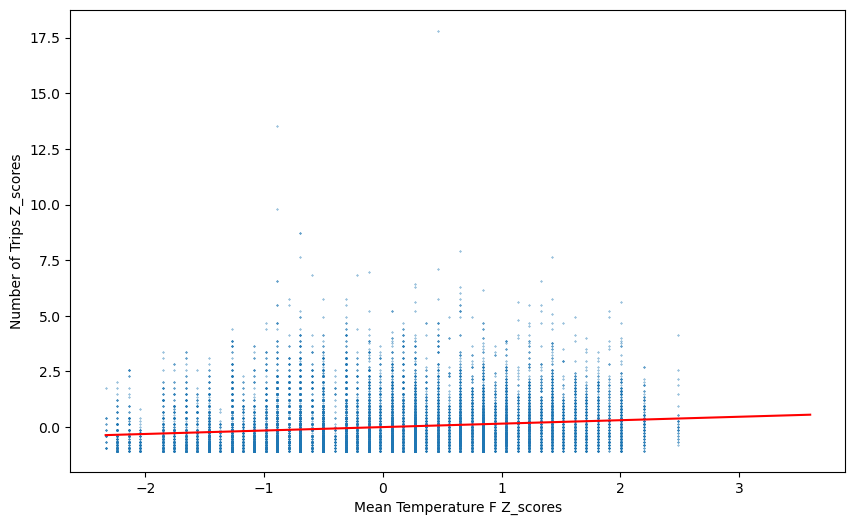

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[cols], y_train, s=0.1)

x = np.linspace(X_train[cols].min(), 3.6, 100)

y = regressor.predict(x)

plt.plot(x, y, '-r')

# # Adding labels to each axis
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')

# calling the plot
plt.show()

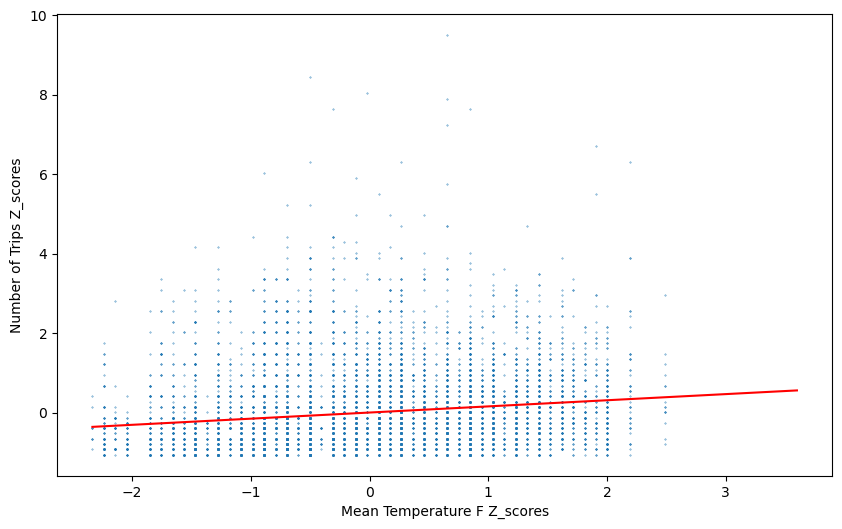

In [25]:
# Same as above
# notice the difference in the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('Mean Temperature F Z_scores')
plt.ylabel('Number of Trips Z_scores')
plt.show()

In [26]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [27]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [28]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  5.34
MSE =  53.23
RMSE =  7.3
R^2 =  0.02


In [29]:
cols =['Mean_Temperature_F', 'Events_BLANK', 'Events_Fog', 'Events_Fog-Rain',
       'Events_Rain', 'Events_Rain-Snow', 'Events_Rain-Thunderstorm',
       'Events_Snow']

In [30]:
# call the method
regressor = LinearRegression( fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4))

MAE =  5.308
MSE =  52.7494
RMSE =  7.2629
R^2 =  0.031


In [31]:
regressor.score(X_test[cols],y_test)

0.03103888524166698